In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

In [460]:
def get_content(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    return soup

In [461]:
def merge_contents(data):
    return data.find_all('p')

In [462]:
def tokenize(content):
    words = []
    for line in content:
        out = line.get_text().replace("(", "").replace(")", "").replace("-", " ").replace(",", "").replace(".", "")
        out = re.sub('\S\d{1,3}\S', '', out)
        words.extend(re.sub("\W", " ", out).split())
    return words

In [488]:
def lower_collection(collection):
    word_lower = []
    for word in collection:
        word_lower.append(word.lower())
    return word_lower

In [464]:
def count_frequency(collection):
    df = pd.DataFrame({"word":np.unique(collection, return_counts=True)[0],
                      "count":np.unique(collection, return_counts=True)[1]})
    return df.sort_values(by="count", ascending=False)
    

In [465]:
def print_most_frequent(frequencies, n):
    return frequencies.head(n)

In [466]:
def visualize(frequencies, n, xlabel):
    fig = plt.figure(figsize=(6, 4), dpi=200)
    ax = fig.add_subplot(1, 1, 1)
    ax.barh(frequencies[:n].sort_values(by='count')["word"], frequencies[:n].sort_values(by='count')["count"], height=0.9, color="xkcd:red", edgecolor=None)
    ax.set_xlabel(xlabel)
    plt.rc('font', size=9) 
    plt.rc('xtick', labelsize=9) 
    plt.rc('ytick', labelsize=9) 

In [467]:
def remove_stop_words(words, stop_words):
    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    return filtered_words

In [492]:
url = "https://en.wikipedia.org/wiki/Ozone_layer"
soup = get_content(url)
merge_content = merge_contents(soup)
collection = tokenize(merge_content)
collection = lower_collection(collection)
frequencies = count_frequency(collection)

In [494]:
print_most_frequent(frequencies, 10)

,word,count
643,the,174
449,of,79
472,ozone,71
52,and,62
325,in,56
664,to,53
338,is,35
22,a,32
111,by,23
359,layer,22


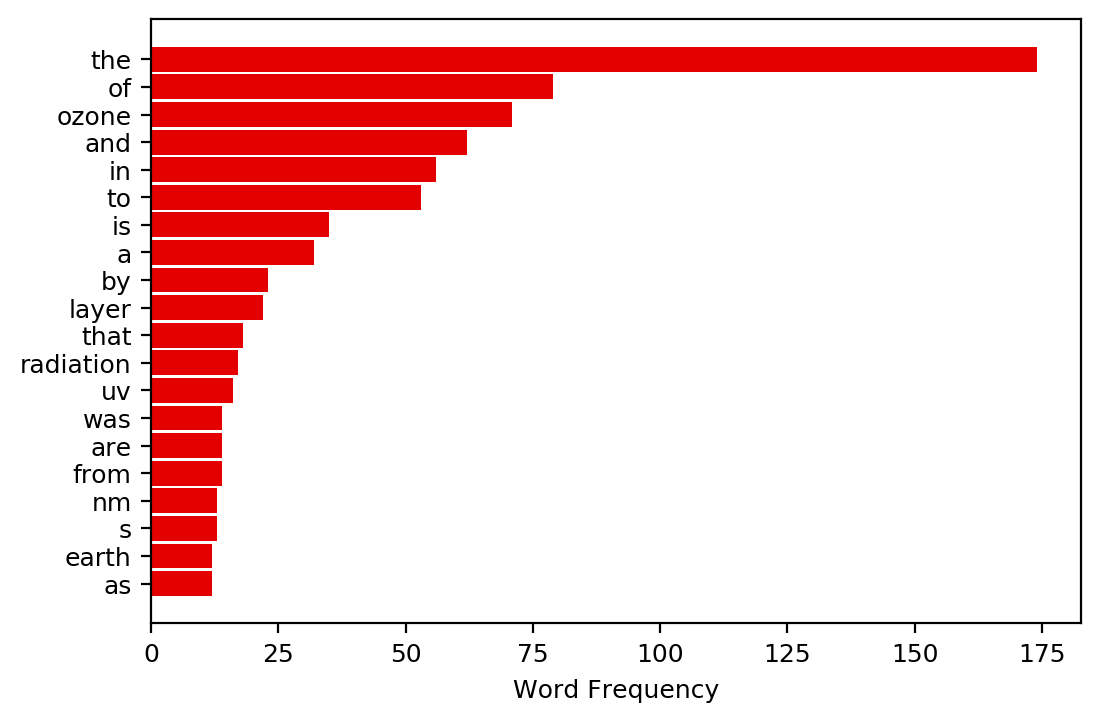

In [495]:
visualize(frequencies, 20, xlabel="Word Frequency")

In [496]:
stop_words = [ "the", "a", "of", "to", "in", "about", "is", 
                  "and", "an", "by", "that", "was", "are", 
              "from", "as", "it", "than", "at", "for", "be",
             "with", "this", "have", "this", "on", "these", 
             "which", "because", "has", "into", "can", "out",
             "all", "most", "other", "although", "its", "between", 
              "being", "were", "over", "been", "parser"]

In [497]:
filtered_collection = remove_stop_words(collection, stop_words)

In [498]:
frequencies_filtered = count_frequency(filtered_collection)

In [499]:
print_most_frequent(frequencies_filtered, 25)

,word,count
441,ozone,71
334,layer,22
485,radiation,17
662,uv,16
407,nm,13
528,s,13
207,earth,12
645,ultraviolet,12
61,atmosphere,12
596,surface,11


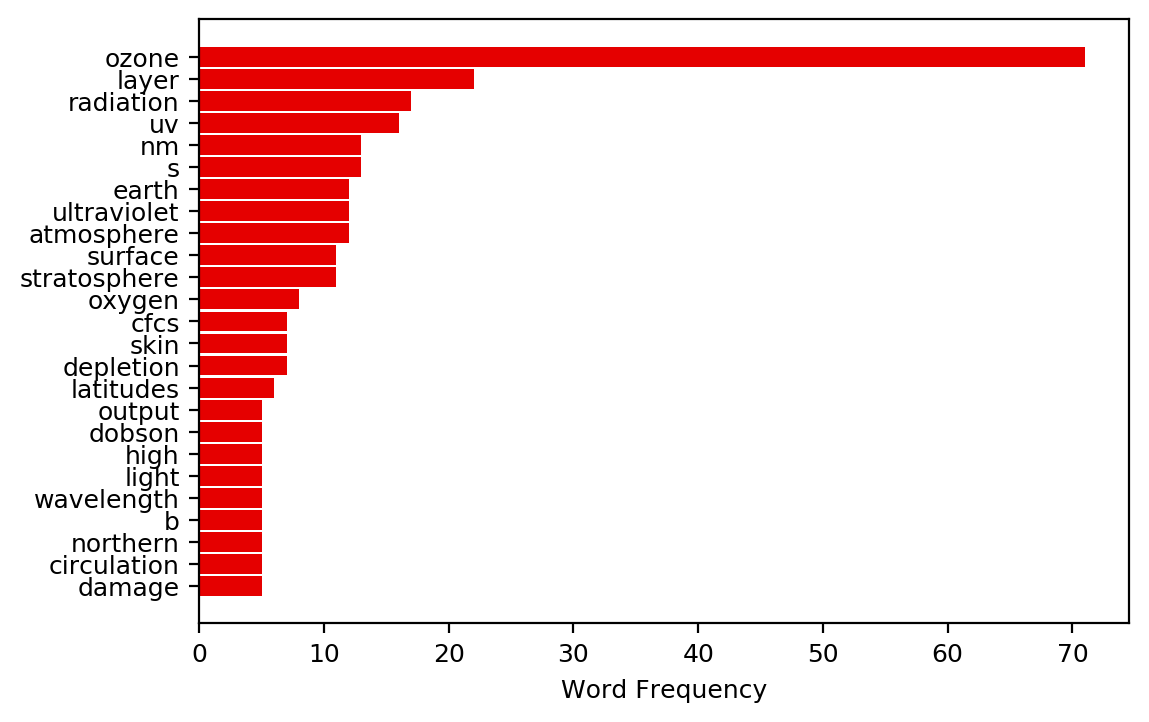

In [500]:
visualize(frequencies_filtered, 25, xlabel="Word Frequency")